## Importing packages

In [4]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'cluster' was built under R version 4.1.3"


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

[[32]]
[1] TRUE

[[33]]
[1] TRUE

[[34]]
[1] TRUE

[[35]]
[1] TRUE

[[36]]
[1] TRUE

[[37]]
[1] TRUE

[[38]]
[1] TRUE

## Importing and Cleaning dataset

In [2]:
df_during <- read_excel(path = here('Data','during_dataset.xlsx'))
df_during <- data.frame(df_during)
unique(sapply(df_during, class))
df_during <- df_during[complete.cases(df_during), ]
dim(df_during)
head(df_during)

[1] "numeric"

[1] 1250   44

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,soccer,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Converting dataset types and labels

In [3]:
df_during$PA_intensity[df_during$PA_intensity == 4] <- 0
df_during$PA_duration[df_during$PA_duration == 5] <- 0
df_during$PA_weekly_frequency[df_during$PA_weekly_frequency == 4] <- 0
df_during$PA_practice_during <- ifelse(df_during$PA_practice_during == 0, 1, 0)
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during < 5] <- 0
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during == 5] <- 1
sum(df_during[, "PA_practice_during"])

[1] 900

In [4]:
sports <- c("running","hiking","cycling",
            "muscle_training","soccer","tennis",
            "volleyball","basketball","swimming",
            "surfing","yoga","pilates","fighting","other_sports")

df_during$PA_number <- rowSums(df_during[, sports])

### Separing barriers from dataset

In [5]:
colnames(df_during)
head(df_during)

[1] "PA_barrier_time_family_responsabilities"
 [2] "PA_barrier__tiredness"                  
 [3] "PA_barrier_places_closed_dangerous"     
 [4] "PA_barrier_money"                       
 [5] "PA_barrier_time_convenience"            
 [6] "PA_barrier_hard_work"                   
 [7] "PA_barrier_no_interest"                 
 [8] "PA_barrier_none"                        
 [9] "PA_easiness_outdoor_activities"         
[10] "PA_easiness_professional_guidance"      
[11] "PA_easiness_unguided"                   
[12] "PA_easiness_music"                      
[13] "PA_easiness_collective"                 
[14] "PA_easiness_home_activity"              
[15] "PA_easiness_family_activity"            
[16] "PA_easiness_home_space"                 
[17] "PA_easiness_home_equipament"            
[18] "PA_easiness_others"                     
[19] "PA_weekly_frequency"                    
[20] "PA_intensity"                           
[21] "PA_duration"                            
[22] "PA_practice_during"                     
[23] "sedentary_time_range_during"            
[24] "sex"                                    
[25] "age_range"                              
[26] "martialStatus"                          
[27] "co.resident_range"                      
[28] "rooms_range"                            
[29] "income_range"                           
[30] "scholarity"                             
[31] "running"                                
[32] "hiking"                                 
[33] "cycling"                                
[34] "muscle_training"                        
[35] "soccer"                                 
[36] "tennis"                                 
[37] "volleyball"                             
[38] "basketball"                             
[39] "swimming"                               
[40] "surfing"                                
[41] "yoga"                                   
[42] "pilates"                                
[43] "fighting"                               
[44] "other_sports"                           
[45] "PA_number"

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports,PA_number
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2


In [6]:
df_during[1:18] <- lapply(df_during[1:18], as.factor)
df_during_barriers_facilitators <- df_during[, 1:18]
dim(df_during_barriers_facilitators)
head(df_during_barriers_facilitators)

[1] 1250   18

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Removing Strangers

In [7]:
differ_p <- (   df_during$PA_duration == 0 
                | df_during$PA_intensity == 0 
                | df_during$PA_weekly_frequency == 0
                | df_during$PA_number == 0
            )
strange_p <- df_during$PA_practice_during == 1 & differ_p
df_during <- df_during[!strange_p, ]
df_during_barriers_facilitators <- df_during_barriers_facilitators[!strange_p, ]
table(strange_p)

differ_dp <- ( df_during$PA_duration != 0 
                | df_during$PA_intensity != 0 
                | df_during$PA_weekly_frequency != 0
                | df_during$PA_number != 0
            ) 
strange_dp <- df_during$PA_practice_during == 0 & differ_dp 


table(strange_dp)
df_during <- df_during[!strange_dp, ]
df_during_barriers_facilitators <- df_during_barriers_facilitators[!strange_dp, ]

strange_p
FALSE  TRUE 
 1244     6 

strange_dp
FALSE  TRUE 
 1218    26 

In [8]:
df_during_barriers_facilitators

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
9,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0
11,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0
12,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


## Finding the best K

#### Elbow Curve

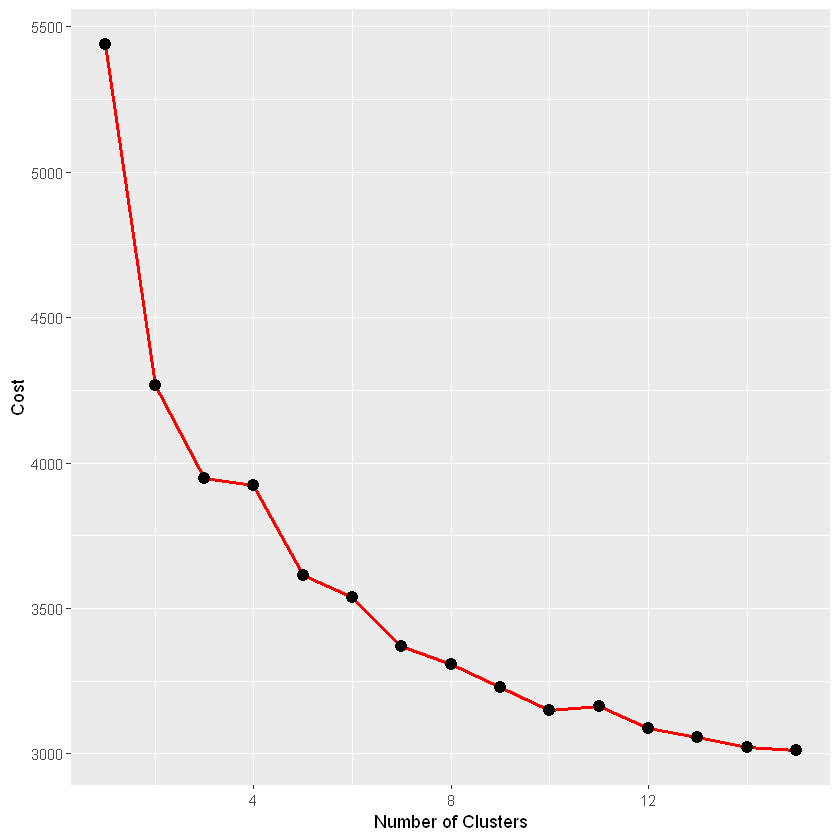

In [9]:
cost <- c()
K = seq(1, 15, 1)
for(num_clusters in K){
    set.seed(2)
    kmode <- kmodes(df_during_barriers_facilitators, num_clusters, iter.max = 20, weighted = FALSE)
    cost <<- append(cost, sum(kmode$withindiff))
}

p = ggplot() + 
    geom_line(data = data.frame(cost, K), aes(x = K,  y = cost), size=1, color="red") +
    geom_point(data = data.frame(cost, K), aes(x = K,  y = cost), size=3) +
    xlab('Number of Clusters') +
    ylab('Cost')

p

#### Silhouette method

In [10]:
df_matrix <- data.matrix(df_during_barriers_facilitators) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_facilitators) - similarity_matrix
head(dissimilarity_matrix)

,2,3,4,5,6,8,9,11,12,14,...,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255
2,0,5,2,3,3,6,4,6,2,4,...,4,6,3,7,6,1,7,4,6,2
3,5,0,7,6,6,7,7,7,3,7,...,5,5,8,10,5,4,6,3,5,3
4,2,7,0,3,5,6,4,6,4,4,...,6,6,3,5,8,3,7,6,8,4
5,3,6,3,0,6,5,5,5,3,3,...,5,7,4,4,7,4,6,7,7,5
6,3,6,5,6,0,7,7,7,5,7,...,3,5,4,8,5,2,6,5,7,3
8,6,7,6,5,7,0,8,6,6,4,...,6,6,9,5,8,5,9,6,6,6


Genrating Ks samples

In [46]:
num_seeds = 100
max_indexs <- c()
max_values <- c()
seed_k <- data.frame(matrix(NA, ncol=num_seeds))
for(seed in 1:num_seeds){
    silhouette_scs <- c()
    for(k in 2:8){
        sc <- silhouette_values(num_clusters=k, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=seed)[[1]]

        silhouette_scs <- append(sc, silhouette_scs)
    }
    mvalue <- max(silhouette_scs)
    max_values <- append(mvalue, max_values)
    max_indexs <- append(9 - match(max(mvalue), silhouette_scs), max_indexs)
}


write.csv(data.frame(k=rev(max_indexs), sc=rev(max_values)),"../Data/silhouette.csv", row.names = FALSE)

In [55]:
best_silhouettes <- read.csv('../Data/silhouette.csv')
best_silhouettes$seed <- seq.int(nrow(best_silhouettes))
head(best_silhouettes[order(best_silhouettes$sc, decreasing=TRUE), ], 10)

,k,sc,seed
,<int>,<dbl>,<int>
68,3,0.1955237,68
46,2,0.1884896,46
32,2,0.1875825,32
21,2,0.1873017,21
19,2,0.1821942,19
13,3,0.1776123,13
62,4,0.1758502,62
33,2,0.1713723,33
45,2,0.1694128,45


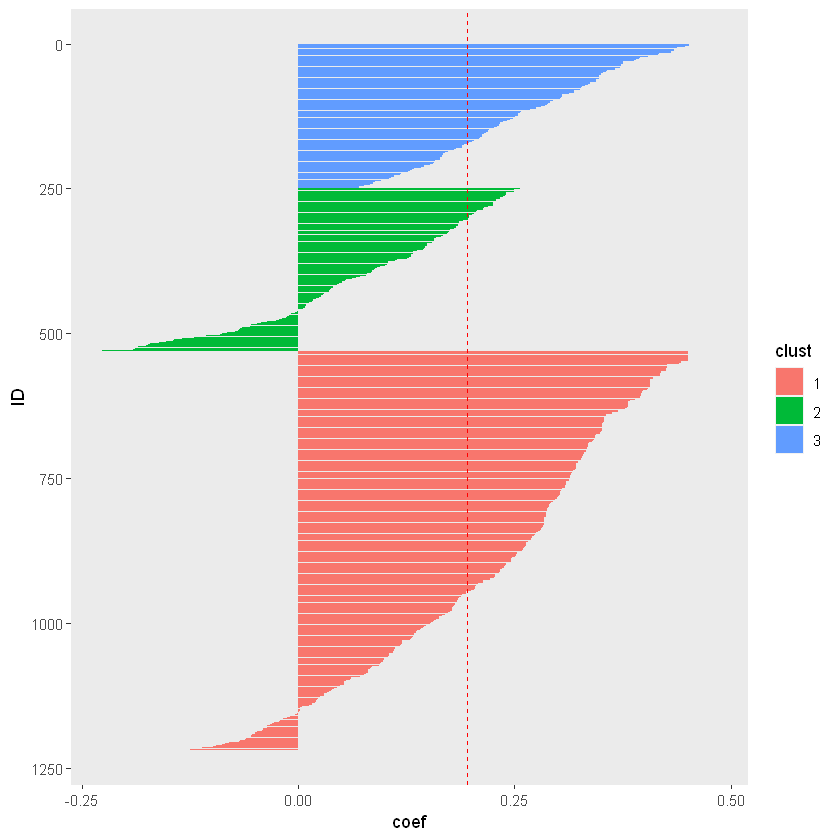

In [62]:
silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
coef_data$clust <- as.factor(coef_data$clust )
coef_data$ID <- seq.int(nrow(coef_data))

ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
  geom_bar(stat = "identity") + 
  geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
  coord_flip() + 
  scale_x_reverse() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

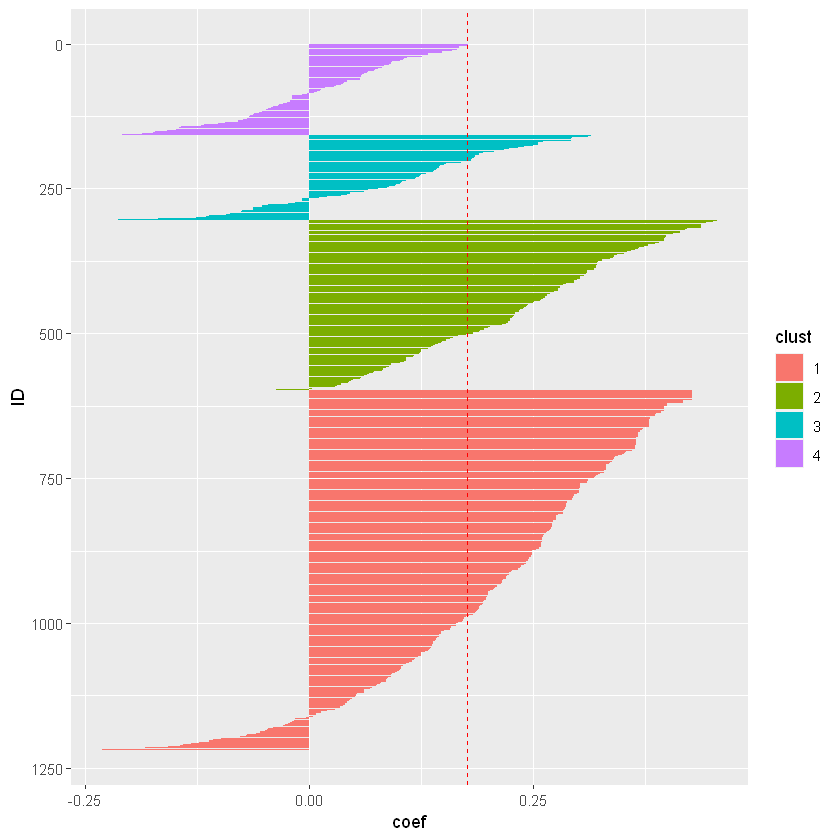

In [60]:
silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
coef_data$clust <- as.factor(coef_data$clust )
coef_data$ID <- seq.int(nrow(coef_data))

ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
  geom_bar(stat = "identity") + 
  geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
  coord_flip() + 
  scale_x_reverse() 

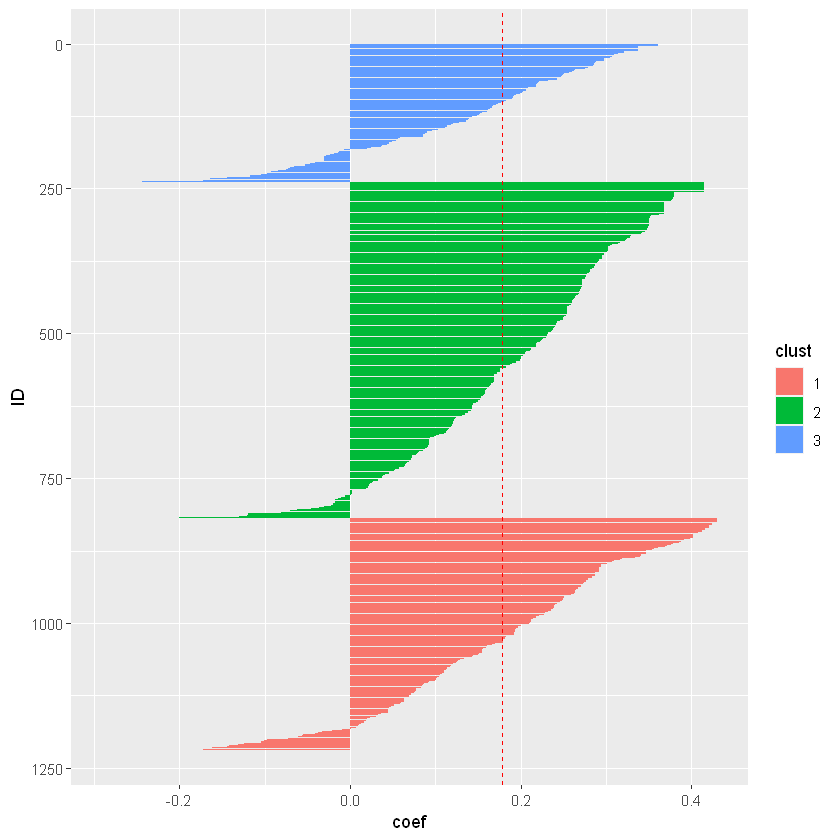

In [61]:
silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
coef_data$clust <- as.factor(coef_data$clust )
coef_data$ID <- seq.int(nrow(coef_data))

ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
  geom_bar(stat = "identity") + 
  geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
  coord_flip() + 
  scale_x_reverse() 

## Exploring K = 4

Adding clusters to the dataset

In [ ]:
set.seed(1)
k = 4

kmode <- kmodes_seed(df_during_barriers_facilitators, k, max_iter=200, seed=47)

cls <- kmode$cluster[!strange_p]
cls <- cls[!strange_dp]

df_during$cluster <- cls
head(df_during)
colnames(df_during)

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports,PA_number,cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2,2
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1
8,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4


[1] "PA_barrier_time_family_responsabilities"
 [2] "PA_barrier__tiredness"                  
 [3] "PA_barrier_places_closed_dangerous"     
 [4] "PA_barrier_money"                       
 [5] "PA_barrier_time_convenience"            
 [6] "PA_barrier_hard_work"                   
 [7] "PA_barrier_no_interest"                 
 [8] "PA_barrier_none"                        
 [9] "PA_easiness_outdoor_activities"         
[10] "PA_easiness_professional_guidance"      
[11] "PA_easiness_unguided"                   
[12] "PA_easiness_music"                      
[13] "PA_easiness_collective"                 
[14] "PA_easiness_home_activity"              
[15] "PA_easiness_family_activity"            
[16] "PA_easiness_home_space"                 
[17] "PA_easiness_home_equipament"            
[18] "PA_easiness_others"                     
[19] "PA_weekly_frequency"                    
[20] "PA_intensity"                           
[21] "PA_duration"                            
[22] "PA_practice_during"                     
[23] "sedentary_time_range_during"            
[24] "sex"                                    
[25] "age_range"                              
[26] "martialStatus"                          
[27] "co.resident_range"                      
[28] "rooms_range"                            
[29] "income_range"                           
[30] "scholarity"                             
[31] "running"                                
[32] "hiking"                                 
[33] "cycling"                                
[34] "muscle_training"                        
[35] "soccer"                                 
[36] "tennis"                                 
[37] "volleyball"                             
[38] "basketball"                             
[39] "swimming"                               
[40] "surfing"                                
[41] "yoga"                                   
[42] "pilates"                                
[43] "fighting"                               
[44] "other_sports"                           
[45] "PA_number"                              
[46] "cluster"

In [ ]:
kmode$modes

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


#### Practice of Exercise 

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


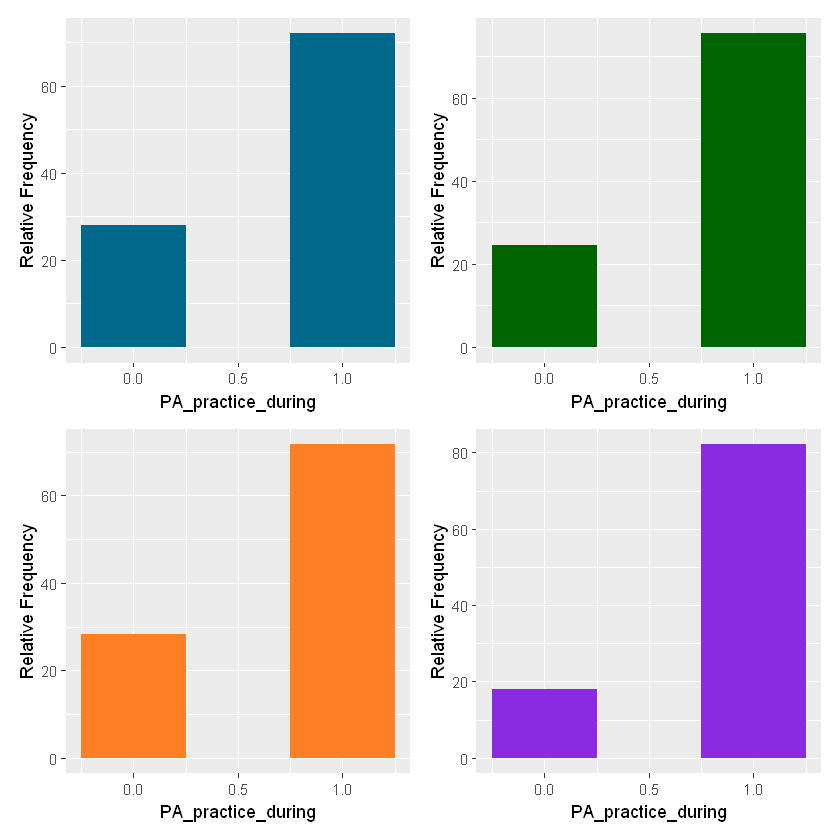

In [ ]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Sedentary Behavior

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


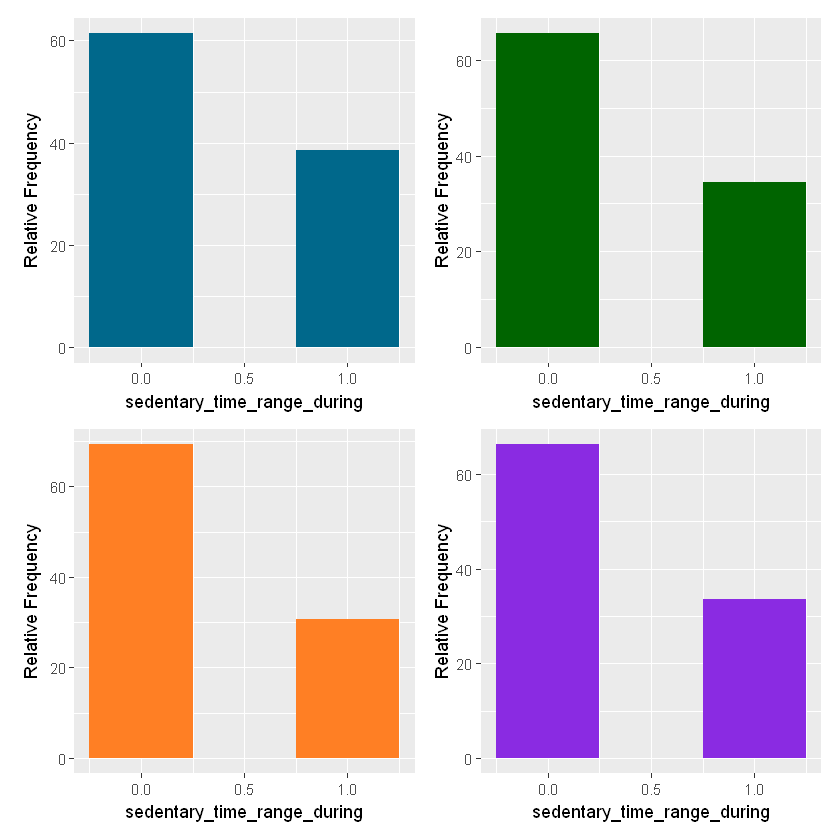

In [ ]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during	, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Intensity

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


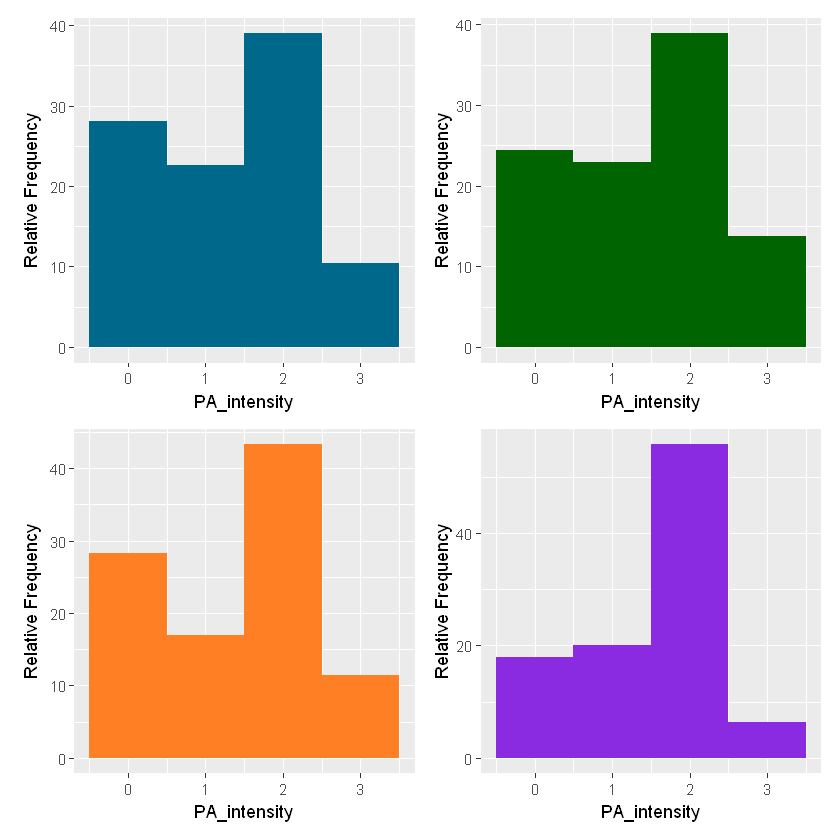

In [ ]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Duration

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


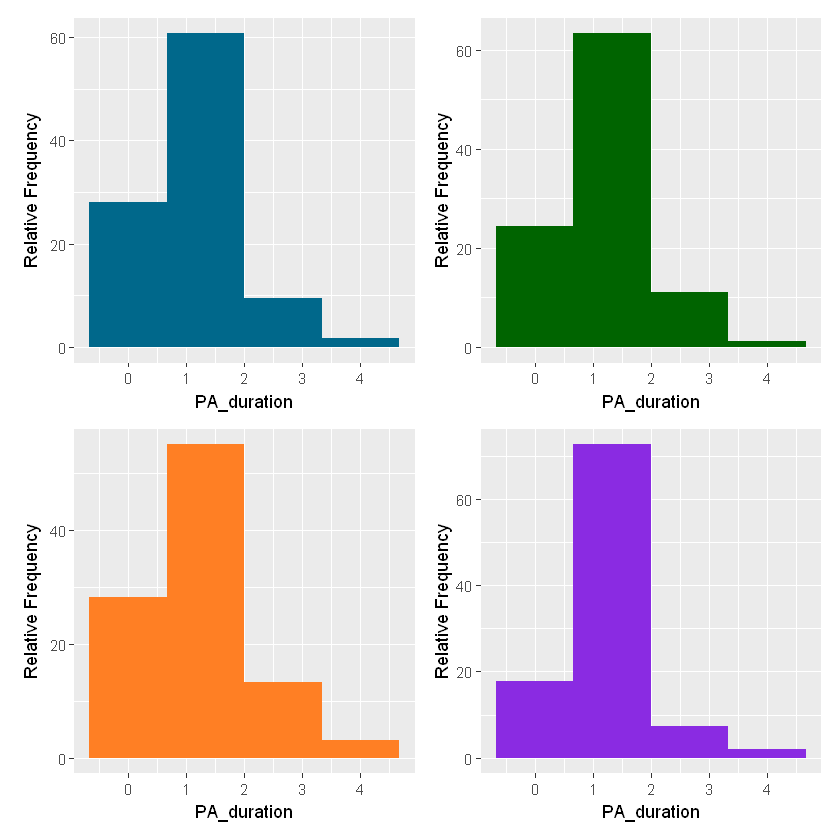

In [ ]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Weekly Frequency

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


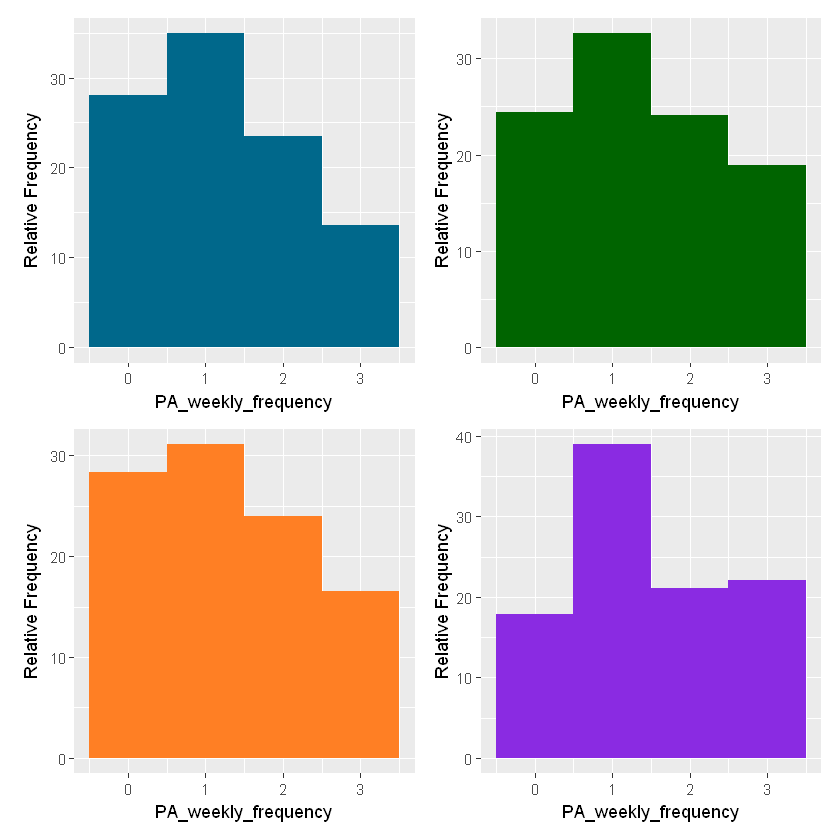

In [ ]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Number of Exercises

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


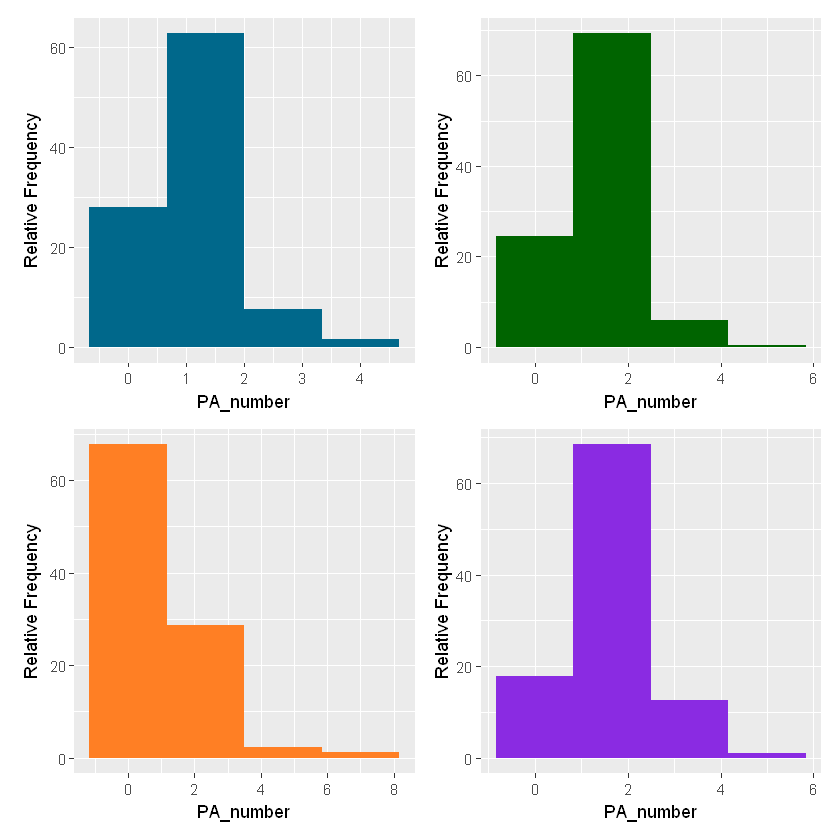

In [ ]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_number, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Income Range

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


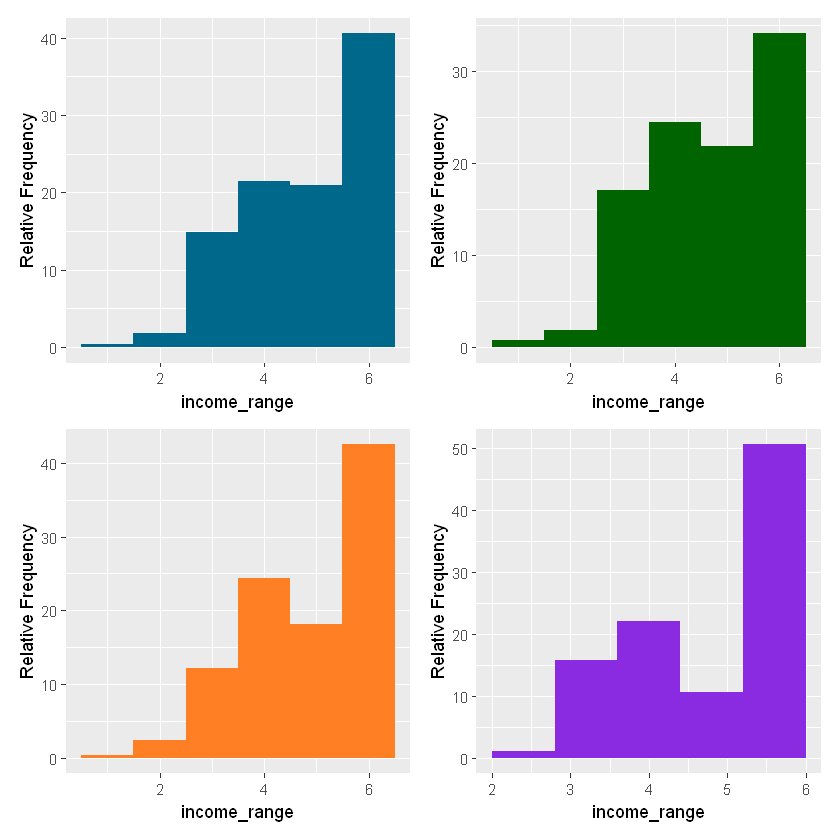

In [ ]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Age Range

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


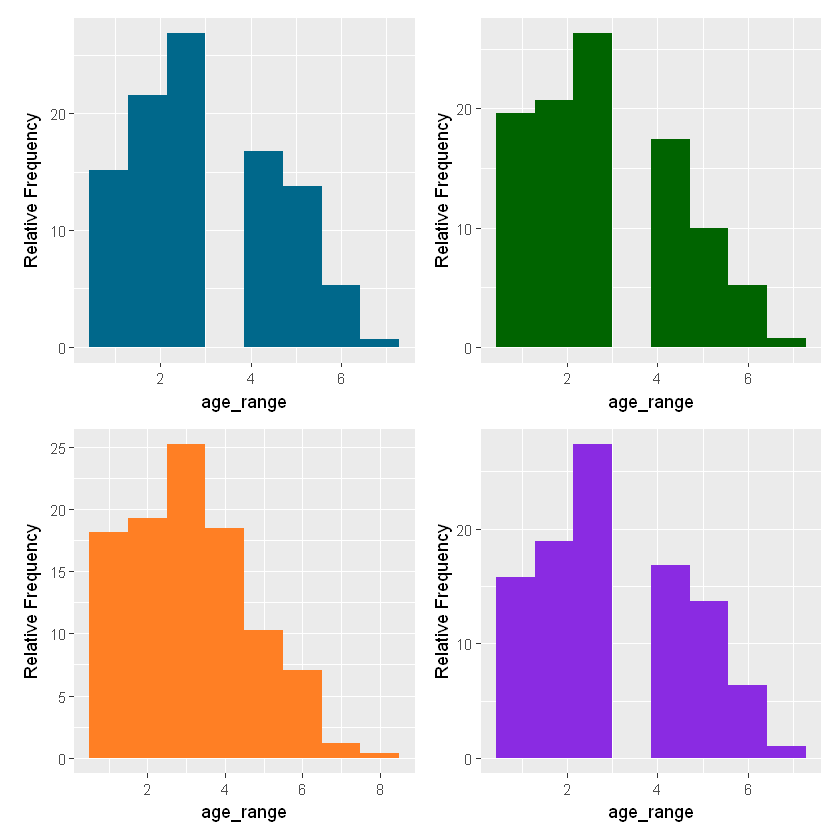

In [ ]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 8,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Sex

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


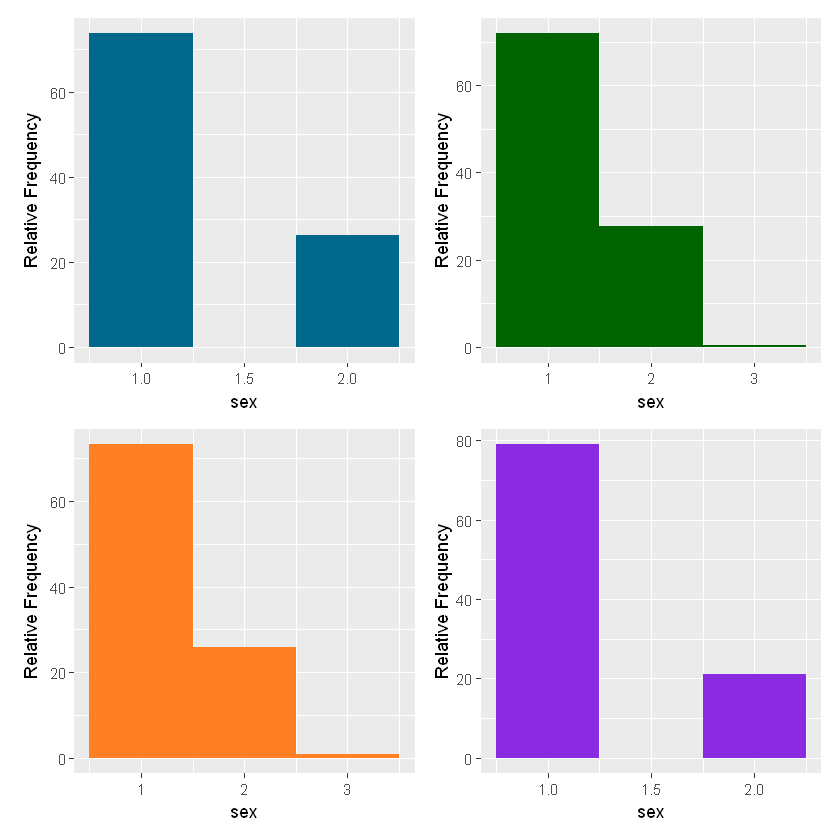

In [ ]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Scholarity

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


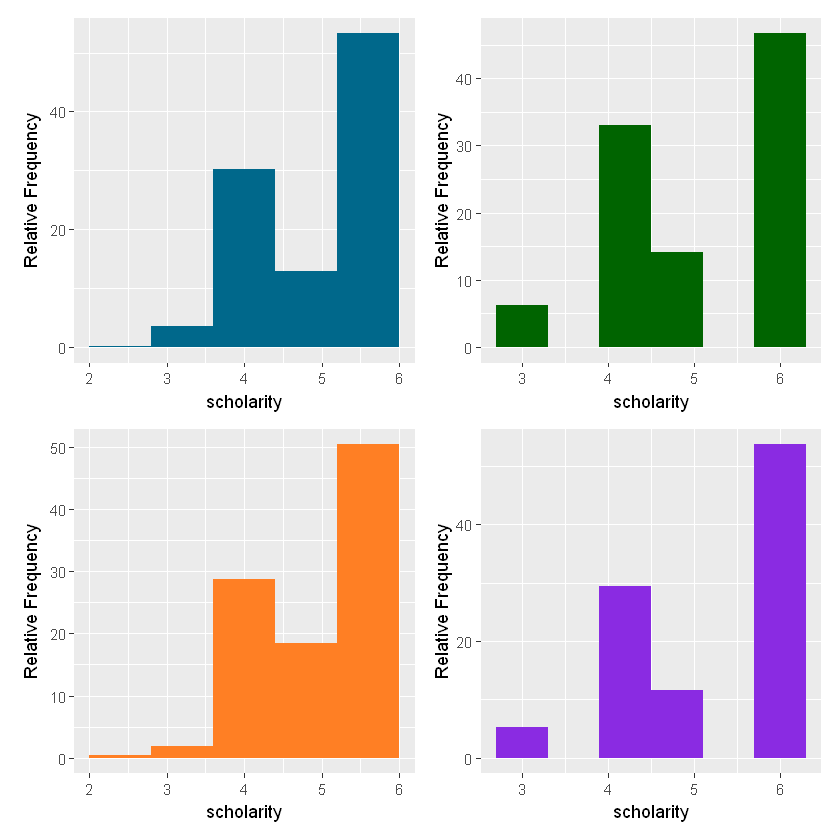

In [ ]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### All charts

In [ ]:
df_during[, -c(ncol(df_during))] <- lapply(df_during[, -c(ncol(df_during))], as.factor)
lapply(df_during, levels)[c("volleyball", "basketball")]
df_during <- subset(df_during, select = -c(volleyball, basketball))

$volleyball
[1] "0"

$basketball
[1] "0"

In [ ]:
dummy <- dummyVars(" ~ .", data=df_during)
df_during_encoded <- data.frame(predict(dummy, newdata = df_during)) 
colnames(df_during_encoded)

[1] "PA_barrier_time_family_responsabilities.0"
  [2] "PA_barrier_time_family_responsabilities.1"
  [3] "PA_barrier__tiredness.0"                  
  [4] "PA_barrier__tiredness.1"                  
  [5] "PA_barrier_places_closed_dangerous.0"     
  [6] "PA_barrier_places_closed_dangerous.1"     
  [7] "PA_barrier_money.0"                       
  [8] "PA_barrier_money.1"                       
  [9] "PA_barrier_time_convenience.0"            
 [10] "PA_barrier_time_convenience.1"            
 [11] "PA_barrier_hard_work.0"                   
 [12] "PA_barrier_hard_work.1"                   
 [13] "PA_barrier_no_interest.0"                 
 [14] "PA_barrier_no_interest.1"                 
 [15] "PA_barrier_none.0"                        
 [16] "PA_barrier_none.1"                        
 [17] "PA_easiness_outdoor_activities.0"         
 [18] "PA_easiness_outdoor_activities.1"         
 [19] "PA_easiness_professional_guidance.0"      
 [20] "PA_easiness_professional_guidance.1"      
 [21] "PA_easiness_unguided.0"                   
 [22] "PA_easiness_unguided.1"                   
 [23] "PA_easiness_music.0"                      
 [24] "PA_easiness_music.1"                      
 [25] "PA_easiness_collective.0"                 
 [26] "PA_easiness_collective.1"                 
 [27] "PA_easiness_home_activity.0"              
 [28] "PA_easiness_home_activity.1"              
 [29] "PA_easiness_family_activity.0"            
 [30] "PA_easiness_family_activity.1"            
 [31] "PA_easiness_home_space.0"                 
 [32] "PA_easiness_home_space.1"                 
 [33] "PA_easiness_home_equipament.0"            
 [34] "PA_easiness_home_equipament.1"            
 [35] "PA_easiness_others.0"                     
 [36] "PA_easiness_others.1"                     
 [37] "PA_weekly_frequency.0"                    
 [38] "PA_weekly_frequency.1"                    
 [39] "PA_weekly_frequency.2"                    
 [40] "PA_weekly_frequency.3"                    
 [41] "PA_intensity.0"                           
 [42] "PA_intensity.1"                           
 [43] "PA_intensity.2"                           
 [44] "PA_intensity.3"                           
 [45] "PA_duration.0"                            
 [46] "PA_duration.1"                            
 [47] "PA_duration.2"                            
 [48] "PA_duration.3"                            
 [49] "PA_duration.4"                            
 [50] "PA_practice_during.0"                     
 [51] "PA_practice_during.1"                     
 [52] "sedentary_time_range_during.0"            
 [53] "sedentary_time_range_during.1"            
 [54] "sex.1"                                    
 [55] "sex.2"                                    
 [56] "sex.3"                                    
 [57] "age_range.1"                              
 [58] "age_range.2"                              
 [59] "age_range.3"                              
 [60] "age_range.4"                              
 [61] "age_range.5"                              
 [62] "age_range.6"                              
 [63] "age_range.7"                              
 [64] "age_range.8"                              
 [65] "martialStatus.1"                          
 [66] "martialStatus.2"                          
 [67] "martialStatus.3"                          
 [68] "martialStatus.4"                          
 [69] "co.resident_range.1"                      
 [70] "co.resident_range.2"                      
 [71] "co.resident_range.3"                      
 [72] "co.resident_range.4"                      
 [73] "rooms_range.1"                            
 [74] "rooms_range.2"                            
 [75] "rooms_range.3"                            
 [76] "rooms_range.4"                            
 [77] "income_range.1"                           
 [78] "income_range.2"                           
 [79] "income_range.3"                           
 [80] "income_range.4"                           
 [

In [ ]:
df_spider <- df_during_encoded %>% group_by(cluster) %>% summarise(
                                    practice = sum(PA_practice_during.1),
                                    sedentary = sum(sedentary_time_range_during.1),
                                    intesity1 = sum(PA_intensity.1),
                                    intesity2 = sum(PA_intensity.2),
                                    intesity3 = sum(PA_intensity.3),
                                    duration1 = sum(PA_duration.1),
                                    duration2 = sum(PA_duration.2),
                                    duration3 = sum(PA_duration.3),
                                    duration4 = sum(PA_duration.4),
                                    frequency1 = sum(PA_weekly_frequency.1),
                                    frequency2 = sum(PA_weekly_frequency.2),
                                    frequency3 = sum(PA_weekly_frequency.3)
                                )
# df_spider['max'] <- apply(df_spider, 1, max)  
# df_spider['min'] <- apply(df_spider, 1, min)  
df_spider <- df_spider[, -c(1)]
df_spider

practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
408,219,128,221,59,102,242,54,10,198,133,77
204,93,62,105,37,38,133,30,3,88,65,51
182,78,43,110,29,34,106,34,8,79,61,42
78,32,19,53,6,17,52,7,2,37,20,21
22,9,2,15,5,0,13,8,1,8,7,7


In [ ]:
max_min <- data.frame(
    practice = c(400, 0),
    sedentary = c(400, 0),
    intesity1 = c(400, 0),
    intesity2 = c(400, 0),
    intesity3 = c(400, 0),
    duration1 = c(400, 0),
    duration2 = c(400, 0),
    duration3 = c(400, 0),
    duration4 = c(400, 0),
    frequency1 = c(400, 0),
    frequency2 = c(400, 0),
    frequency3 = c(400, 0)
)
rownames(max_min) <- c("Max", "Min")
df_spider <- rbind(max_min, df_spider)
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,400,400,400,400,400,400,400,400,400,400,400,400
Min,0,0,0,0,0,0,0,0,0,0,0,0
1,408,219,128,221,59,102,242,54,10,198,133,77
2,204,93,62,105,37,38,133,30,3,88,65,51
3,182,78,43,110,29,34,106,34,8,79,61,42
4,78,32,19,53,6,17,52,7,2,37,20,21
5,22,9,2,15,5,0,13,8,1,8,7,7


In [ ]:
create_beautiful_radarchart <- function(data, color = "#00AFBB", 
                                        vlabels = colnames(data), vlcex = 0.7,
                                        caxislabels = NULL, title = NULL, ...){
  radarchart(
    data, axistype = 1,
    # Customize the polygon
    pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
    # Customize the grid
    cglcol = "grey", cglty = 1, cglwd = 0.8,
    # Customize the axis
    axislabcol = "grey", 
    # Variable labels
    vlcex = vlcex, vlabels = vlabels,
    caxislabels = caxislabels, title = title, ...
  )
}

In [ ]:
df_spider <- df_spider[c("Max", "Min", 3, 1, 2, 4), ]
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,400,400,400,400,400,400,400,400,400,400,400,400
Min,0,0,0,0,0,0,0,0,0,0,0,0
3,182,78,43,110,29,34,106,34,8,79,61,42
1,408,219,128,221,59,102,242,54,10,198,133,77
2,204,93,62,105,37,38,133,30,3,88,65,51
4,78,32,19,53,6,17,52,7,2,37,20,21


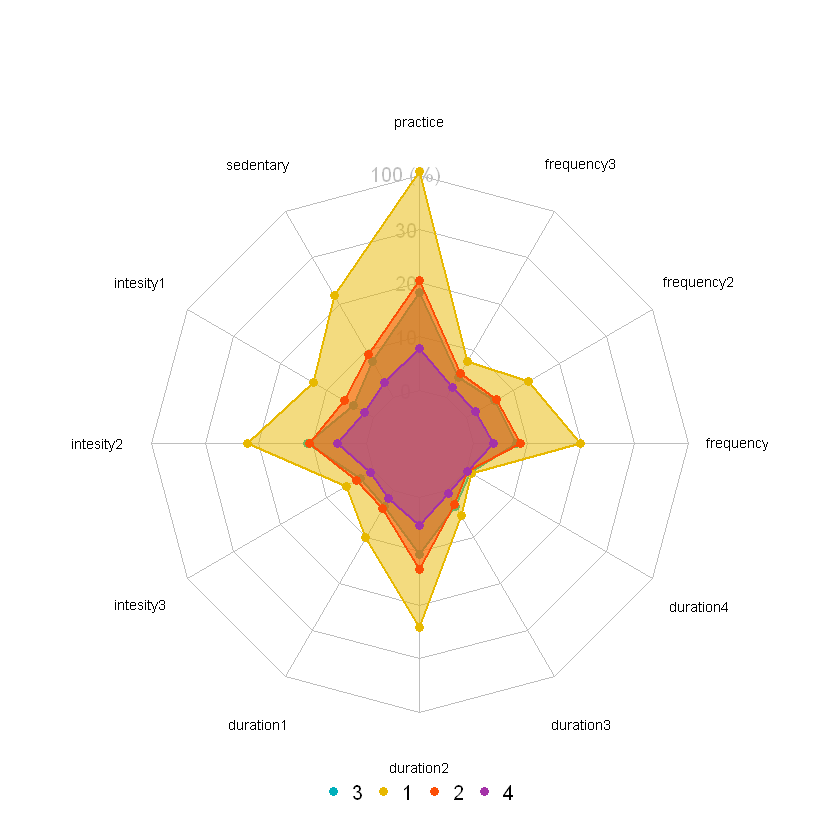

In [ ]:

colors <-  c("#00AFBB", "#E7B800", "#FC4E07", '#a432a8')
titles <- c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4")
op <- par(mar = c(1, 3, 3, 3))


create_beautiful_radarchart(
  data = df_spider, 
  caxislabels = c(0, 10, 20, 30),
  color = colors,

)


legend(
  x = "bottom", legend = rownames(df_spider[-c(1,2),]), horiz = TRUE,
  bty = "n", pch = 20 , col =colors,
  text.col = "black", cex = 1, pt.cex = 1.5
)
par(op)